<a href="https://colab.research.google.com/github/SanyamWadhwa07/ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
X_train = np.loadtxt('/content/drive/MyDrive/ input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/ input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/ labels_test.csv', delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


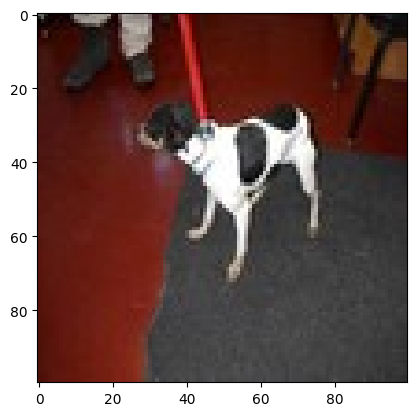

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 23s 688ms/step - loss: 0.7232 - accuracy: 0.5090
Epoch 2/10
32/32 [==============================] - 23s 735ms/step - loss: 0.6877 - accuracy: 0.5600
Epoch 3/10
32/32 [==============================] - 24s 735ms/step - loss: 0.6650 - accuracy: 0.6160
Epoch 4/10
32/32 [==============================] - 29s 914ms/step - loss: 0.6025 - accuracy: 0.6685
Epoch 5/10
32/32 [==============================] - 22s 702ms/step - loss: 0.5571 - accuracy: 0.7135
Epoch 6/10
32/32 [==============================] - 20s 629ms/step - loss: 0.4950 - accuracy: 0.7660
Epoch 7/10
32/32 [==============================] - 22s 707ms/step - loss: 0.4357 - accuracy: 0.8020
Epoch 8/10
32/32 [==============================] - 23s 726ms/step - loss: 0.4066 - accuracy: 0.8195
Epoch 9/10
32/32 [==============================] - 21s 654ms/step - loss: 0.3265 - accuracy: 0.8605
Epoch 10/10
32/32 [==============================] - 23s 713ms/step - loss: 0.2790 - accura

In [12]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 80ms/step - loss: 0.7368 - accuracy: 0.6725


[0.7368382215499878, 0.6725000143051147]

## **accuracy less due to a less data set  will increase with the dataset**





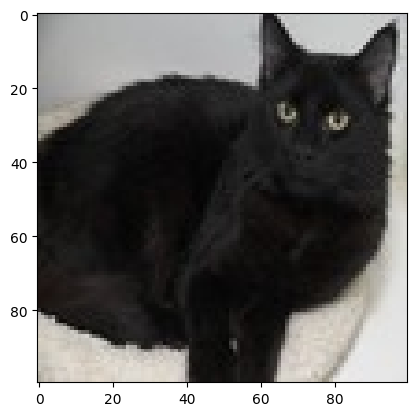

1/1 [==============================] - 0s 25ms/step
Our model says it is a : cat


In [15]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)